本模块的函数族旨在提供对数据误差分组综合检验，同时提供误差频率分布，平均误差、平均绝对误差、均方根误差、准确率等检验指标的综合展示。在浏览本模块函数说明之前可先参阅函数设计的[关键技术思想](https://www.showdoc.cc/meteva?page_id=4072178802924517)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import pandas as pd

[本模块测试数据集简介和更详细的数据收集代码说明](https://www.showdoc.cc/nmc?page_id=3831227192066999) 

In [2]:
###################以下开始为数据收集部分的程序

#设置关注的起始时段
time_start = datetime.datetime(2019,1,1,8,0)   
time_end = datetime.datetime(2020,1,1,8,0)
#读取站点列表，并将站点内容为缺省值，当其作为读取站点数据的参数时，如果站点文件中某个站号不存在时,返回结果中该站点保持为缺省值
station = meb.read_stadata_from_micaps3(r"H:\test_data\input\mpd\ob\temp_2m\BT19010102.000")
station.iloc[:,-1] = meb.IV 


##读取收集观测数据
dir_ob = r"H:\test_data\input\mpd\ob\temp_2m\BTYYMMDDHH.000"
sta_list = []
time0 = time_start
while time0 < time_end:
    path = meb.get_path(dir_ob,time0)
    sta = meb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    sta_list.append(sta)
    time0 += datetime.timedelta(hours = 3)
ob_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
ob_sta_all = meb.sele_by_para(ob_sta_all,value=[-100,100]) #简单的质量控制

#读取收集ec预报数据
dir_ec = r"H:\test_data\input\mpd\ec\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_ec,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["ecmwf"])
            sta_list.append(sta)
    time0 += datetime.timedelta(hours = 132)  #此处跳着读是为了减少测试用时
ec_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
            
#读取收集grapes预报数据
dir_grapes = r"H:\test_data\input\mpd\grapes\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_grapes,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["grapes"])
            sta_list.append(sta)  
    time0 += datetime.timedelta(hours = 132)
grapes_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
    
#数据匹配合并
sta_all = meb.combine_on_obTime_id(ob_sta_all,[ec_sta_all,grapes_sta_all])
sta_all = meb.sele_by_para(sta_all,drop_IV = True)  #删除包含缺省值的样本
###################以上为数据收集部分的程序

H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.000 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.003 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.006 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.009 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.012 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.015 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.018 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.021 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.024 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.027 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.030 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.033 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.036 is not exist
H:\test_data\input\mpd\ec\temp_2m\190101\BT19010108.039 is not exist
H:\test_data\input\mpd\ec\temp_2m\

H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.000 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.003 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.006 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.009 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.012 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.015 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.018 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.021 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.024 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.027 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.030 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.033 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.036 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT1904

# 误差综合分析图   
**error_boxplot(sta_ob_and_fos,s = None,g = None,gll=None,group_name_list=None,  
                     threshold = 2,save_dir=None,show = False,title="误差综合分析图"):**  
根据输入的站点数据，选择部分数据，将选择的数据进行进行分组检验，绘制误差综合分析图  


# 误差综合分析图（绝对值） 
**error_boxplot_abs(sta_ob_and_fos,s = None,g = None,gll=None,group_name_list=None,  
                     threshold = 2,save_dir=None,show = False,title="误差综合分析图"):**  
和根据输入的站点数据，选择部分数据，将选择的数据进行进行分组检验，绘制误差综合分析图  


|参数|说明（上述两个函数参数意义和用法完全相同）|  
|:--|:--|  
|**sta_ob_and_fos**|实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的sta_all|             
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**g**|用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>g</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|     
|**gll**| 用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>gll</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|  
|**group_name_list**| 指定分组的名称，它将被作为绘图的x轴坐标|  
|**threshold**| 计算准确率使用的误差阈值|  
|**save_dir**| 图片输出路径|  
|**show**| 是否在屏幕显示图片，如果save_dir 为None时，程序内部会自动将show设置True|  
|**title**|指定图片标题|  
|<font face="黑体" color=blue size=3>return</font>|无返回值|  
  
**调用示例：**

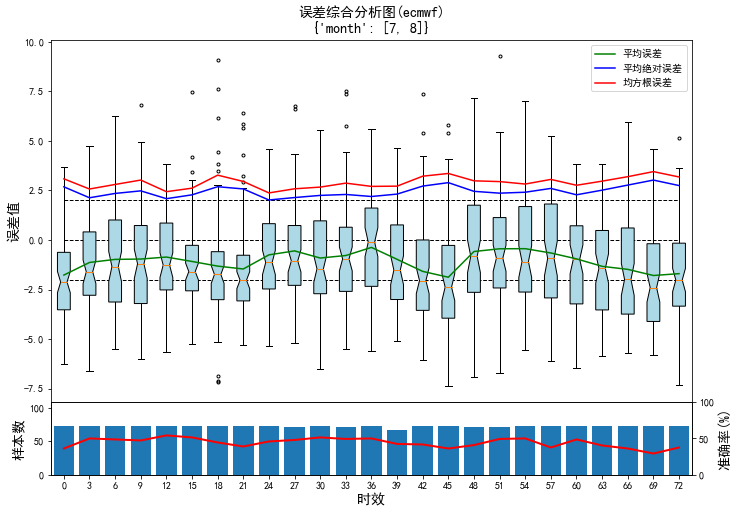

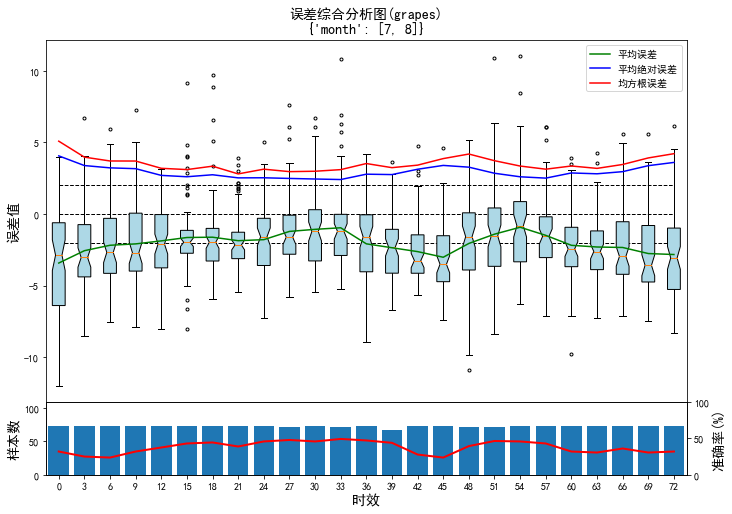

In [42]:
mpd.error_boxplot(sta_all,s = {"month":[7,8]},g = "dtime") #提取7，8月份的数据，按时效分类检验

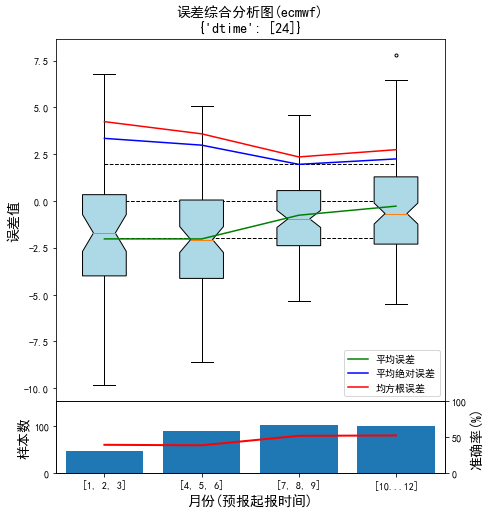

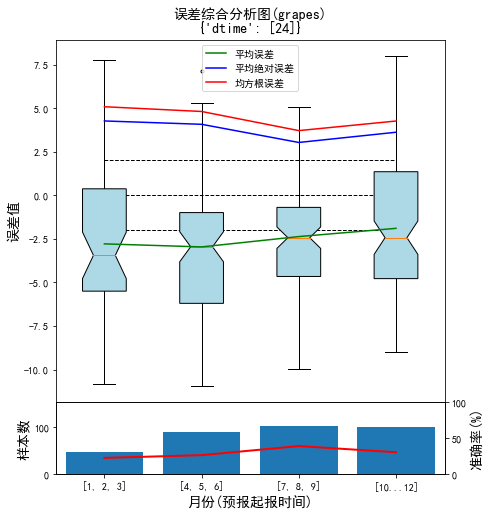

In [43]:
mpd.error_boxplot(sta_all,s = {"dtime":[24]},g = "month",gll=[[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

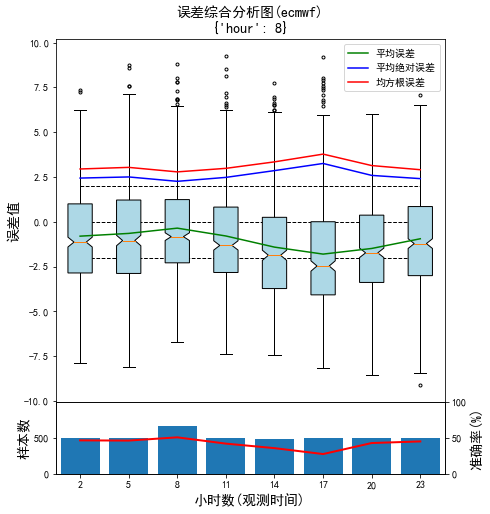

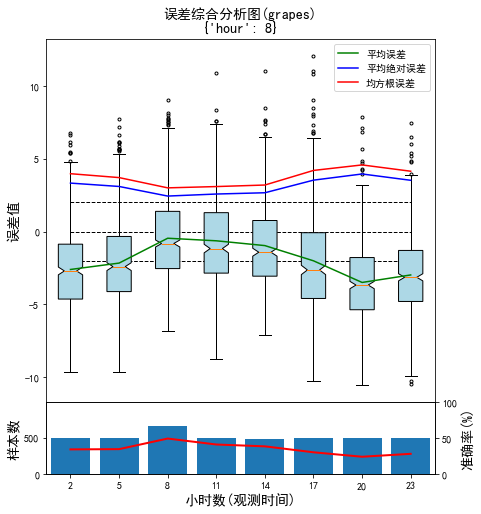

In [45]:
mpd.error_boxplot(sta_all,s = {"hour":8},g = "ob_hour")

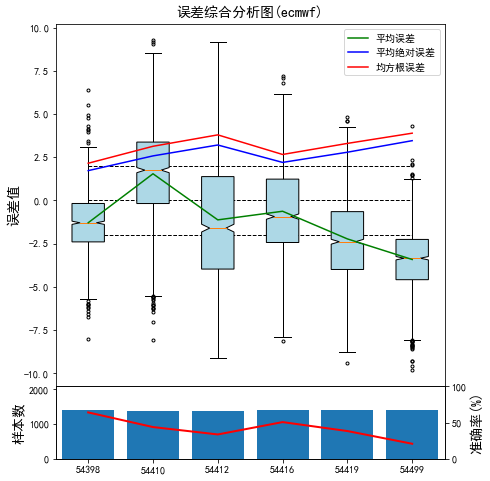

In [47]:
mpd.error_boxplot(sta_all,s = {"member":["ob","ecmwf"]},g = "id")

<Figure size 684x576 with 0 Axes>

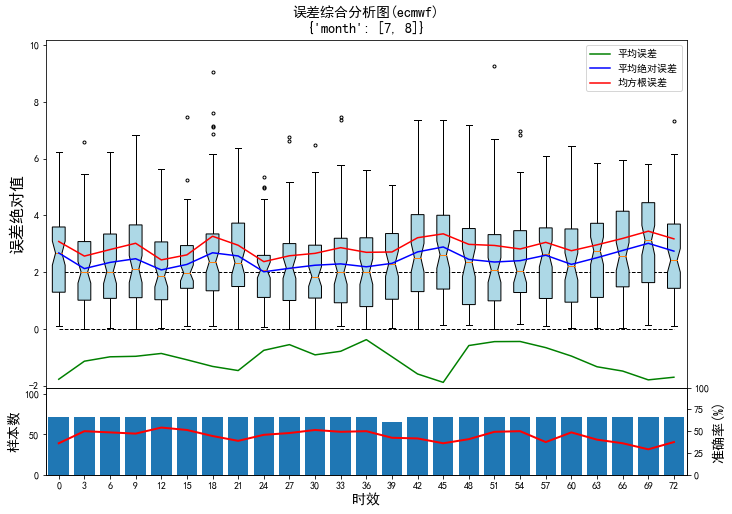

In [54]:
#提取7，8月份的ecmwf数据，按时效分类检验（箱须图显示误差绝对值分布）
mpd.error_boxplot_abs(sta_all,s = {"month":[7,8],"member":["ob","ecmwf"]},g = "dtime") 